In [60]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/armaa/Downloads/medical_cost_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Checking Duplicate value
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
#Drop duplicate values
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
#Unique counts for Quality feature
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
#Unique counts for Quality feature
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
change_data={'sex':{'male':0,'female':1},
            'smoker':{'no':0,'yes':1},
            'region':{'northwest':0,'northeast':1,'southeast':2,'southwest':3}
            }
medical_cost=df.copy()
medical_cost.replace(change_data,inplace=True)

In [14]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [15]:
medical_cost.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.514948,1.105572,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
#Exploratory Data Analysis

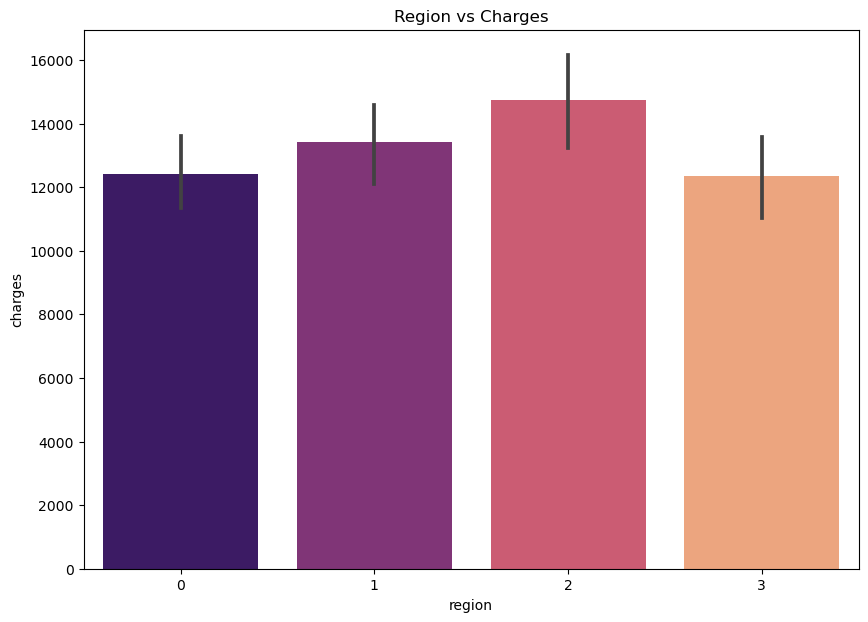

In [24]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charges')
sns.barplot(x='region',y='charges',data=medical_cost, palette='magma')
plt.show()

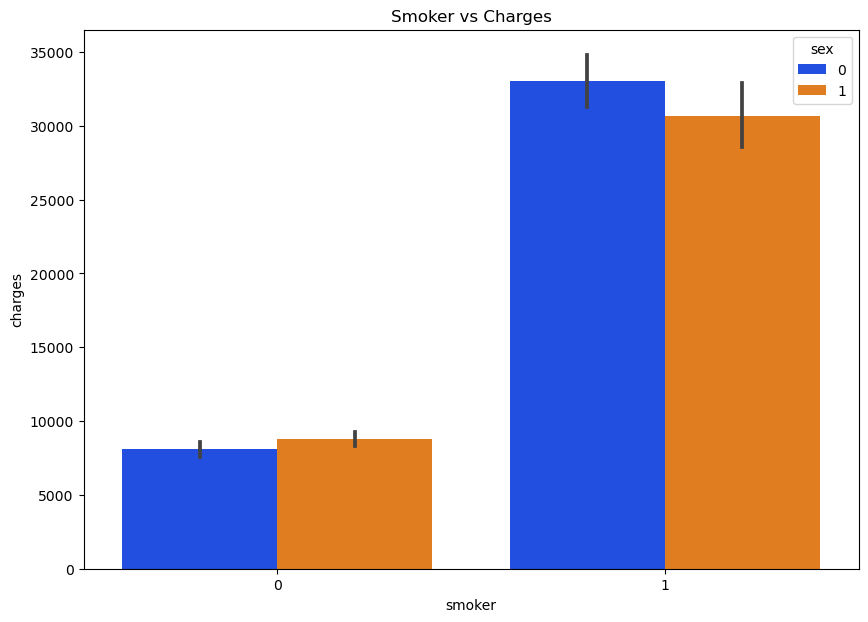

In [25]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charges')
sns.barplot(x='smoker',y='charges',data=medical_cost, palette='bright',hue='sex')
plt.show()

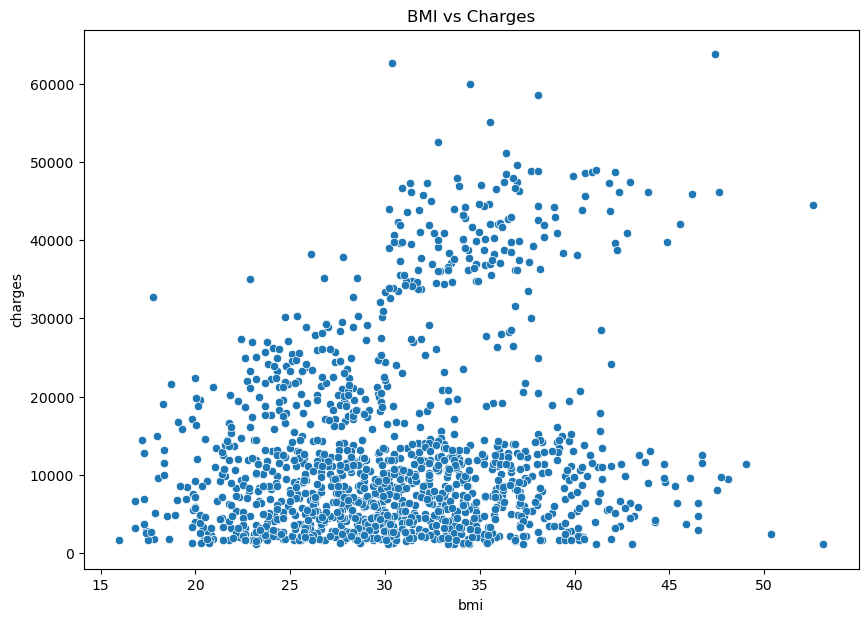

In [29]:
plt.figure(figsize=(10,7))
plt.title('BMI vs Charges')
sns.scatterplot(x='bmi',y='charges',data=medical_cost, palette='muted')
plt.show()

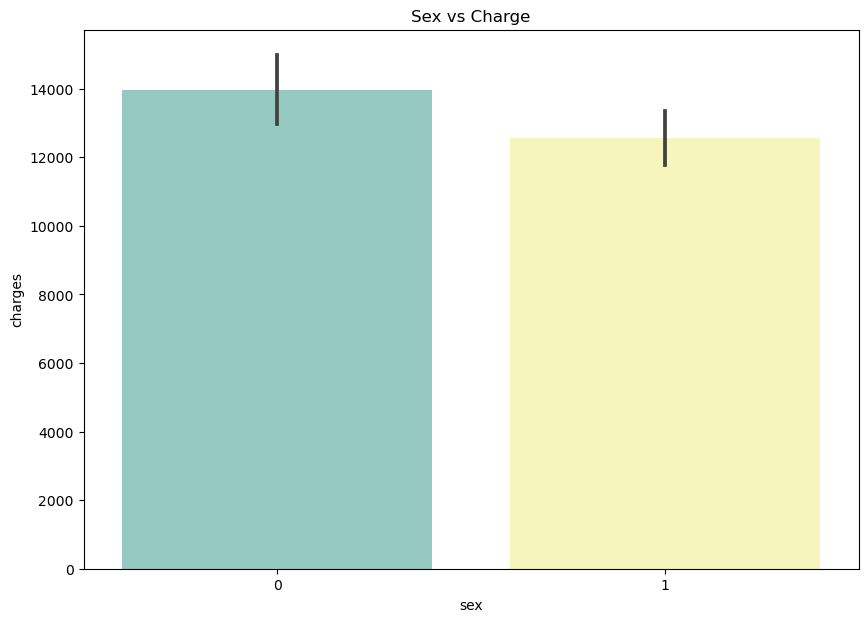

In [30]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=medical_cost, palette='Set3')
plt.show()

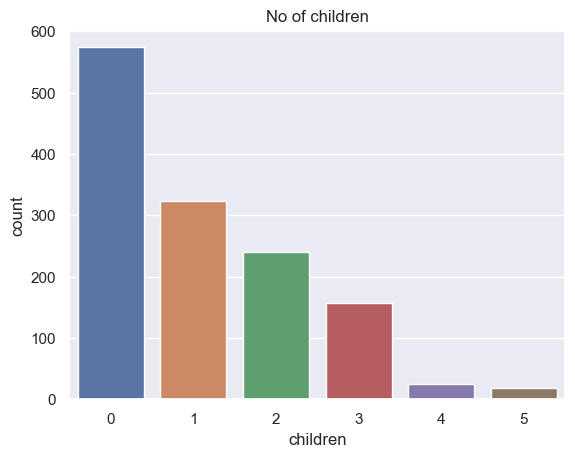

In [31]:
sns.set()
sns.countplot(x='children',data=medical_cost)
plt.title('No of children')
plt.show()

In [33]:
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [37]:
#Calculate and print skewness and kurtosis for all columns
print("Printing Skewness and Kurtosis for all columns")
print()
for col in medical_cost.columns:
    skewness=medical_cost[col].skew()
    kurtosis=medical_cost[col].kurt()
    print(f"-{col}:skewness{skewness:.3f} and kurtosis{kurtosis:.3f}")

Printing Skewness and Kurtosis for all columns

-age:skewness0.056 and kurtosis-1.245
-sex:skewness0.021 and kurtosis-2.003
-bmi:skewness0.284 and kurtosis-0.051
-children:skewness0.938 and kurtosis0.202
-smoker:skewness1.465 and kurtosis0.146
-region:skewness-0.038 and kurtosis-1.329
-charges:skewness1.516 and kurtosis1.606


<Figure size 1000x700 with 0 Axes>

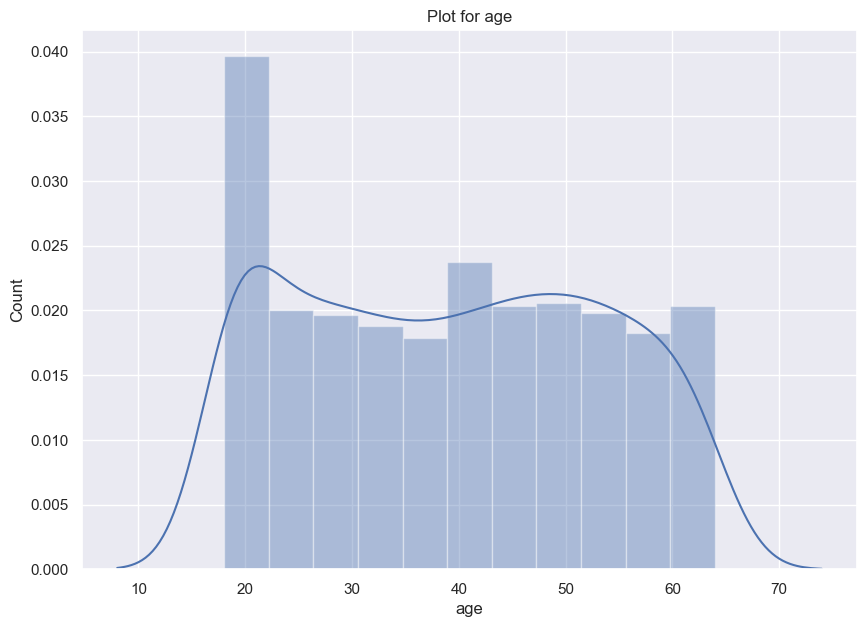

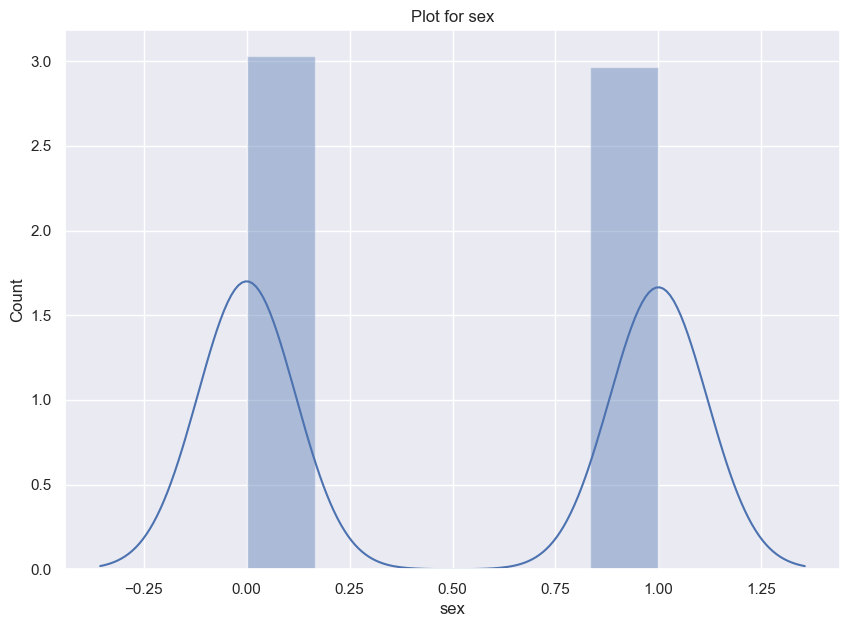

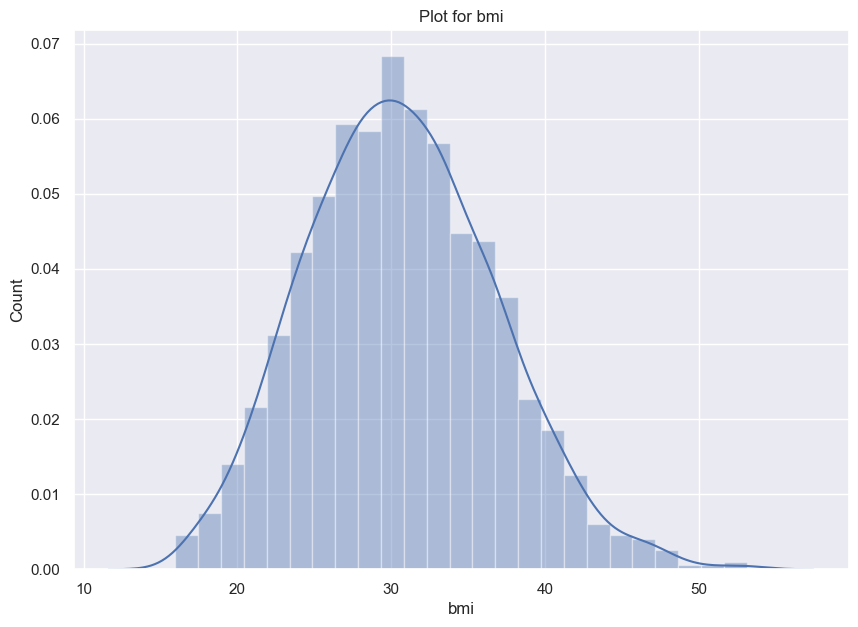

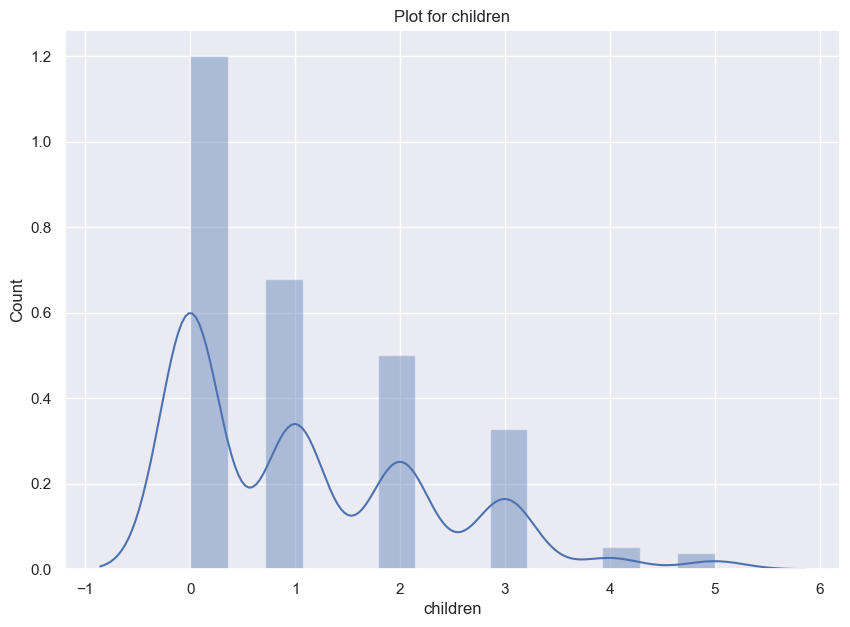

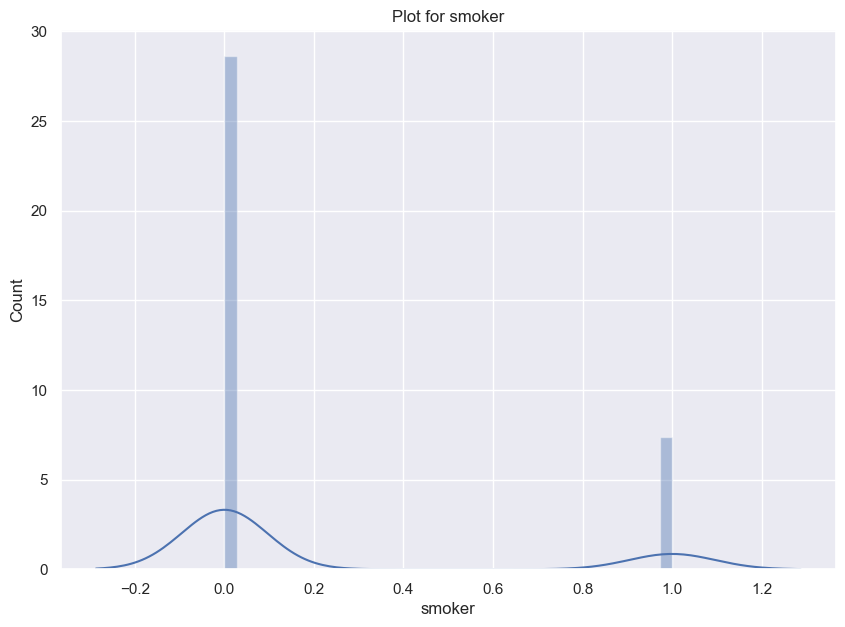

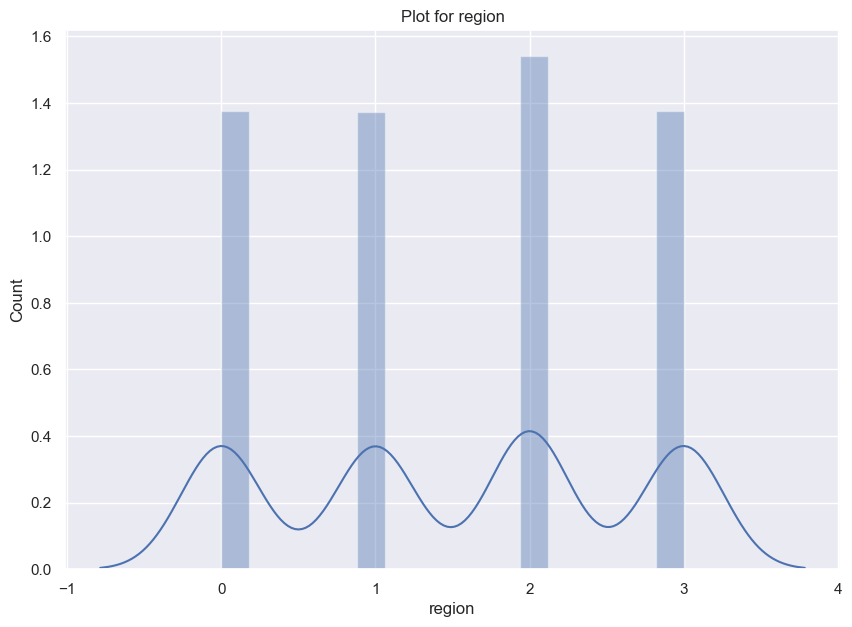

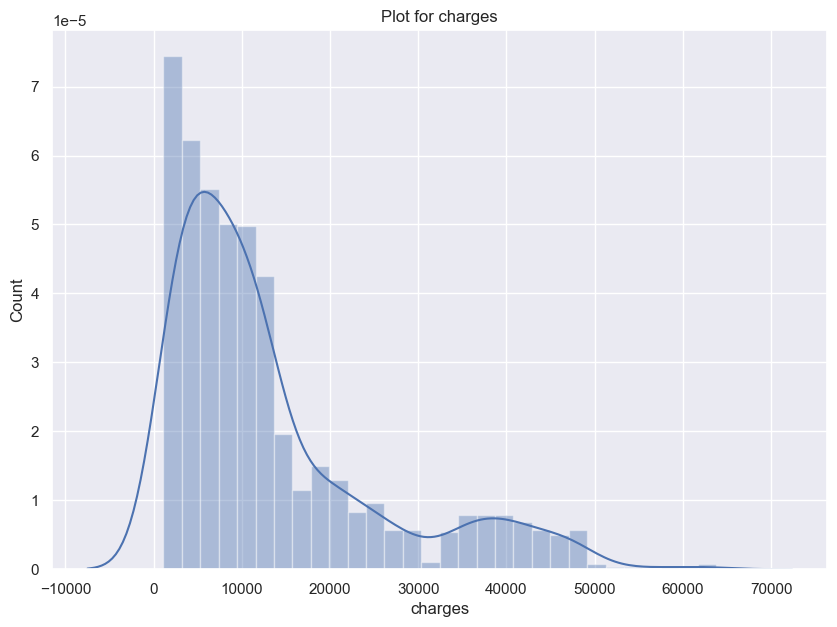

In [38]:
# List of features in the dataset
features = medical_cost.columns

# Set the size of the figure for all plots
plt.figure(figsize=(10, 7))

# Loop through each feature and create a distribution plot
for feature in features:
    plt.figure(figsize=(10, 7))  # Set the size of each plot
    sns.distplot(medical_cost[feature])
    plt.title(f"Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [42]:
#List of columns to standardize
column_to_standardize=['bmi','age','charges']
#Initialize StandardScaler
scaler=StandardScaler()
#Standardize each column in the DataFrame
medical_cost[column_to_standardize]=scaler.fit_transform(medical_cost[column_to_standardize])

In [67]:
X=medical_cost.drop('charges',axis=1).values
y=medical_cost['charges'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Size of X_train :', X_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_train :', y_train.shape)
print('Size of y_test :',y_test.shape)

Size of X_train : (1070, 6)
Size of X_test : (268, 6)
Size of y_train : (1070, 1)
Size of y_test : (268, 1)


In [68]:
def evaluate_model(model,X_train,y_train,X_trest,y_test):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    train_mse=mean_squared_error(y_train,y_train_pred)
    test_mse=mean_squared_error(y_test,y_test_pred)
    r2=r2_score(y_test,y_test_pred)
    
    plt.figure(figsize=(15,6))
    plt.scatter(y_test,y_test_pred,alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Valued")
    plt.title("Actual vs Predicted values using Linear Regression", fontsize=16)
    plt.show()
    
    print("Best Parameters for Linear Regression :",model.get_params())
    print("\nMean Squared Error on Training Data :",train_mse)
    print("Mean Squared Error on Testing Data :", test_mse)
    print("R-Squared of the Model :",r2)

In [69]:
# Create a Linear Regression instance
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

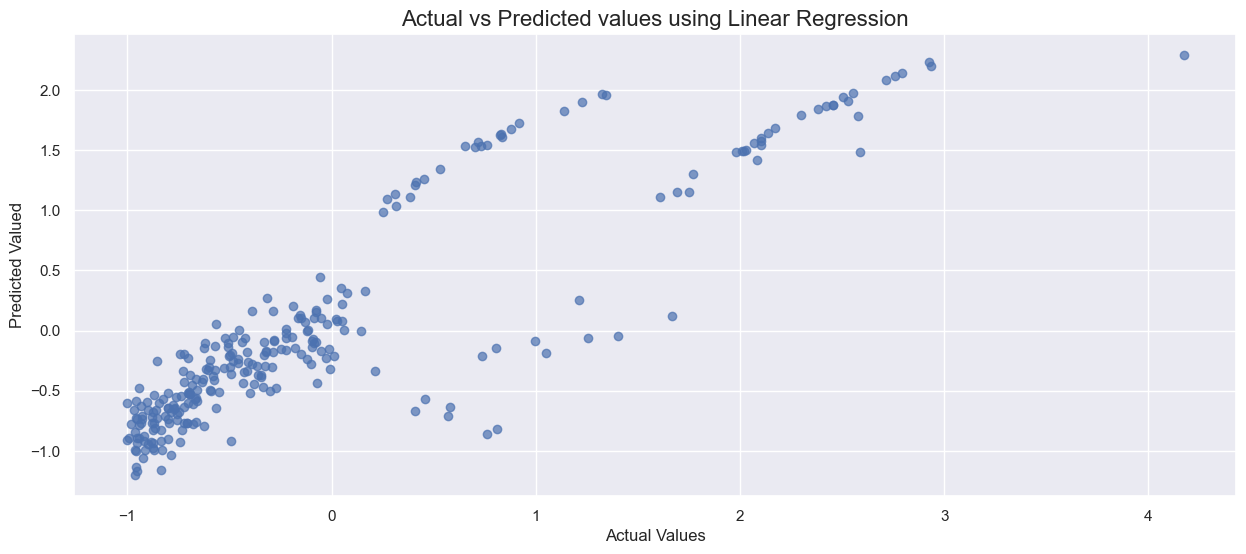

Best Parameters for Linear Regression : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}

Mean Squared Error on Training Data : 0.2546912906251973
Mean Squared Error on Testing Data : 0.2302160746302599
R-Squared of the Model : 0.7826938736089379


In [71]:
#Evaluate the model
evaluate_model(linear_reg,X_train,y_train,X_test,y_test)

In [72]:
svr=SVR()

In [73]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [74]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, y_train.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=100, gamma=0.01, tol=0.0001)
0.8280120997575008


In [75]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.828
R2_score (train) : 0.853
R2 score (test) : 0.867
RMSE : 0.375
